<a href="https://colab.research.google.com/github/Srinikshith/Codsoft/blob/main/Spam_SMS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SPAM SMS DETECTION**

Spam SMS detection is the process of identifying and classifying SMS messages as either spam or ham . Spam messages are unsolicited messages that are sent for commercial or malicious purposes. Ham messages are legitimate messages that are sent by known senders.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data= pd.read_csv( 'spam.csv', encoding="Latin-1")


In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.shape

(5589, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5589 entries, 0 to 5588
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5589 non-null   object
 1   v2          5589 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 218.4+ KB


In [ ]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5539
Unnamed: 3    5577
Unnamed: 4    5583
dtype: int64

In [ ]:
#delete last 3 columns
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [ ]:
data.sample(5)

,v1,v2
3641,ham,My house here e sky quite dark liao... If rain...
4880,ham,When/where do I pick you up
1816,ham,Are you going to write ccna exam this week??
1745,ham,IåÕm cool ta luv but v.tired 2 cause i have be...
2789,ham,When you are big..| God will bring success.


In [ ]:
#rename columns
data.columns=['type','text']
data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data['type'] = data['type'].replace({'ham': 0, 'spam': 1})

In [ ]:
data.head(

)

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#check missing values
data.isnull().sum()

type    0
text    0
dtype: int64

In [ ]:
#check for duplicate values
data.duplicated().sum()

420

In [ ]:
#remove duplicate values
df=data.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
df['type'].value_counts()

0    4516
1     653
Name: type, dtype: int64

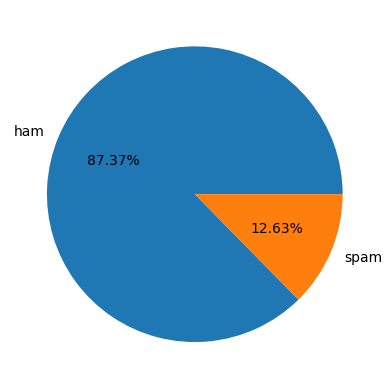

In [ ]:
# Create the pie chart
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(), labels=['ham','spam'], autopct='%0.2f%%')
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#determine total characters
df['char_count']=df['text'].apply(len)
df.head()

<ipython-input-22-0579acefeea6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_count']=df['text'].apply(len)


,type,text,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#determine total words and sentences
df['word_count']=df['text'].apply((lambda x:len(nltk.word_tokenize(x))))
df['sen_count']=df['text'].apply((lambda x:len(nltk.sent_tokenize(x))))
df.sample(5)

<ipython-input-23-5cc00a8601a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count']=df['text'].apply((lambda x:len(nltk.word_tokenize(x))))
<ipython-input-23-5cc00a8601a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sen_count']=df['text'].apply((lambda x:len(nltk.sent_tokenize(x))))


,type,text,char_count,word_count,sen_count
630,0,Please dont say like that. Hi hi hi,35,9,2
1491,1,Your account has been credited with 500 FREE T...,130,28,2
5521,0,You are a big chic. Common. Declare,35,9,3
3401,0,'An Amazing Quote'' - \Sometimes in life its d...,143,33,2
37,0,I see the letter B on my car,28,8,1


In [ ]:
#ham
df[df['type']==0][['char_count','word_count','sen_count']].describe()

,char_count,word_count,sen_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['type']==1][['char_count','word_count','sen_count']].describe()

,char_count,word_count,sen_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='char_count', ylabel='Count'>

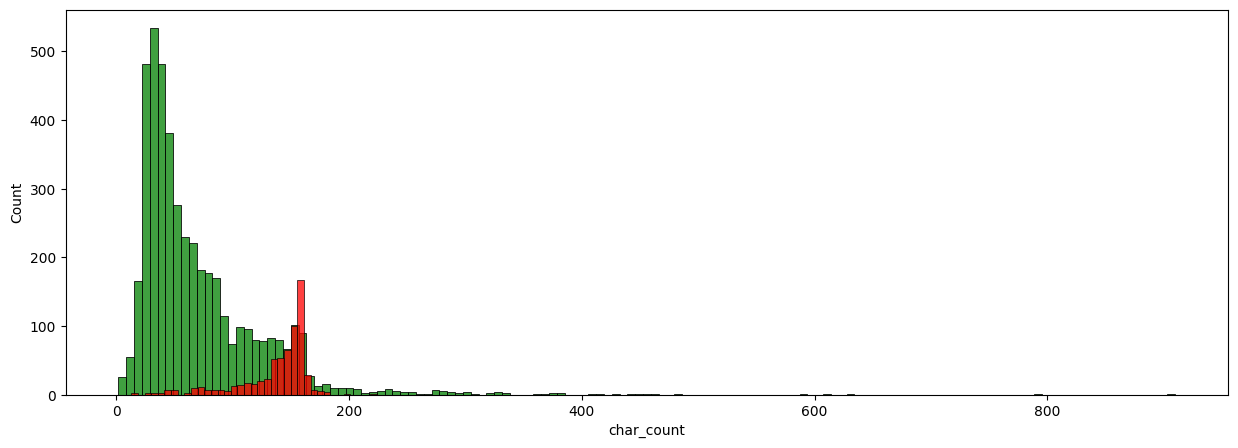

In [ ]:
#plot histogram for ham and spam char_count
plt.figure(figsize=(15,5))
sns.histplot(df[df['type']==0]['char_count'],color='green')
sns.histplot(df[df['type']==1]['char_count'],color='red')

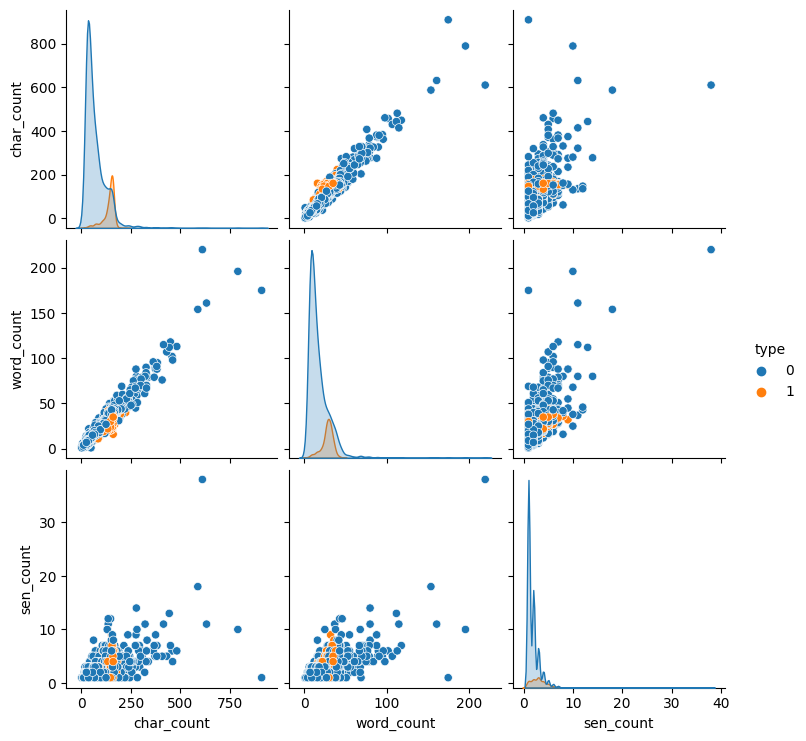

In [ ]:
sns.pairplot(df,hue='type')

<ipython-input-28-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

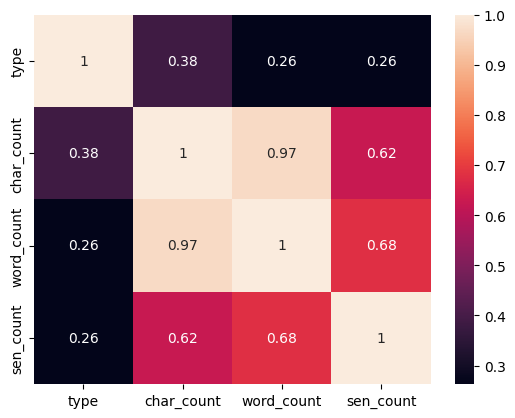

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
pip install nltk


In [ ]:
import nltk


In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Now you can use the 'stop_words' set in your text processing tasks.


In [ ]:
from nltk.corpus import stopwords
import string

:

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
def trasform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text) #Token
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
df['t_text']=df['text'].apply(trasform_text)

<ipython-input-37-50f8dbb64dce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t_text']=df['text'].apply(trasform_text)


In [ ]:
df.head()

,type,text,char_count,word_count,sen_count,t_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#word cloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [ ]:
#spam wordcloud
spam_wc=wc.generate(df[df['type'] == 1]['t_text'].str.cat(sep=" "))

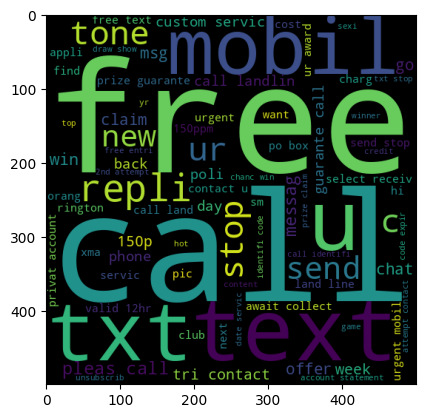

In [ ]:
plt.imshow(spam_wc)

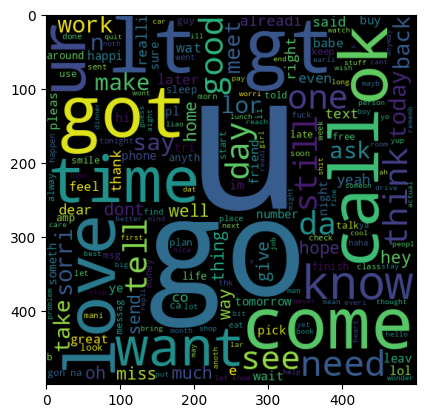

In [ ]:
#ham wordcloud
spam_wc=wc.generate(df[df['type'] == 0]['t_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

**Model** **Building** **using** **Naive** **Bayes**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
x=cv.fit_transform(df['t_text']).toarray()
y=df['type'].values

In [ ]:
x.shape

(5169, 6708)

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
mnb=MultinomialNB()
gnb=GaussianNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(xtrain,ytrain)
y_pred1=gnb.predict(xtest)
print("accur_score is -->",accuracy_score(ytest,y_pred1))
print("con_matrix is -->",confusion_matrix(ytest,y_pred1))
print("pre_score is -->",precision_score(ytest,y_pred1))

accur_score is --> 0.8800773694390716
con_matrix is --> [[792 104]
 [ 20 118]]
pre_score is --> 0.5315315315315315


In [ ]:
mnb.fit(xtrain,ytrain)
y_pred2=mnb.predict(xtest)
print("acc_score is -->",accuracy_score(ytest,y_pred2))
print("c_matrix2 is -->",confusion_matrix(ytest,y_pred2))
print("p_score2 is -->",precision_score(ytest,y_pred2))

acc_score is --> 0.9642166344294004
c_matrix2 is --> [[871  25]
 [ 12 126]]
p_score2 is --> 0.8344370860927153


In [ ]:
bnb.fit(xtrain,ytrain)
y_pred3=bnb.predict(xtest)
print("acc_score3 is -->",accuracy_score(ytest,y_pred3))
print("c_score3 is -->",confusion_matrix(ytest,y_pred3))
print("p_score3 is -->",precision_score(ytest,y_pred3))

acc_score3 is --> 0.9700193423597679
c_score3 is --> [[893   3]
 [ 28 110]]
p_score3 is --> 0.9734513274336283


**TF**-**IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=2000)

In [ ]:
x=tfidf.fit_transform(df['t_text']).toarray()
y=df['type'].values

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2,random_state=2)
mnb=MultinomialNB()
gnb=GaussianNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(xtrain,ytrain)
y_pred1=gnb.predict(xtest)
print("a_score is -->",accuracy_score(ytest,y_pred1))
print("c_matrix is -->",confusion_matrix(ytest,y_pred1))
print("p_score is -->",precision_score(ytest,y_pred1))

a_score is --> 0.851063829787234
c_matrix is --> [[765 131]
 [ 23 115]]
p_score is --> 0.46747967479674796


In [ ]:
mnb.fit(xtrain,ytrain)
y_pred2=mnb.predict(xtest)
print("a_score2 is -->",accuracy_score(ytest,y_pred2))
print("c_matrix2 is -->",confusion_matrix(ytest,y_pred2))
print("p_score2 is -->",precision_score(ytest,y_pred2))

a_score2 is --> 0.97678916827853
c_matrix2 is --> [[896   0]
 [ 24 114]]
p_score2 is --> 1.0


In [ ]:
bnb.fit(xtrain,ytrain)
y_pred3=bnb.predict(xtest)
print("a_score3 is -->",accuracy_score(ytest,y_pred3))
print("c_matrix3 is -->",confusion_matrix(ytest,y_pred3))
print("p_score3 is -->",precision_score(ytest,y_pred3))

a_score3 is --> 0.9864603481624759
c_matrix3 is --> [[895   1]
 [ 13 125]]
p_score3 is --> 0.9920634920634921


**Testing** **the** **Model**

In [ ]:
sms=['K tell me anything about you.,,,']

In [ ]:
tfdt_sms=tfidf.transform(sms)

In [ ]:
test=mnb.predict(tfdt_sms)

In [ ]:
labels = ["ham" if value == 0 else "spam" for value in test]
print(labels)

['ham']
